In [35]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [39]:
# Load dataset (ensure StudentsPerformance.csv is in your Colab working directory)
df = pd.read_csv("/content/StudentsPerformance.csv")

print("✅ Dataset loaded successfully!")
display(df.head())

✅ Dataset loaded successfully!


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [40]:
print("\n📊 Dataset Info:")
print(df.info())

print("\n📈 Summary Statistics:")
print(df.describe(include='all'))

print("\n❓ Missing Values:")
print(df.isnull().sum())



📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

📈 Summary Statistics:
        gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female  

In [41]:
# Create average score column
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Encode categorical variables
le = LabelEncoder()
for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]
y = df['average_score']


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📈 Model Evaluation:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")



📈 Model Evaluation:
Mean Absolute Error: 10.72
Mean Squared Error: 187.45
R² Score: 0.13


In [48]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Linear Regression model trained successfully!")

✅ Linear Regression model trained successfully!


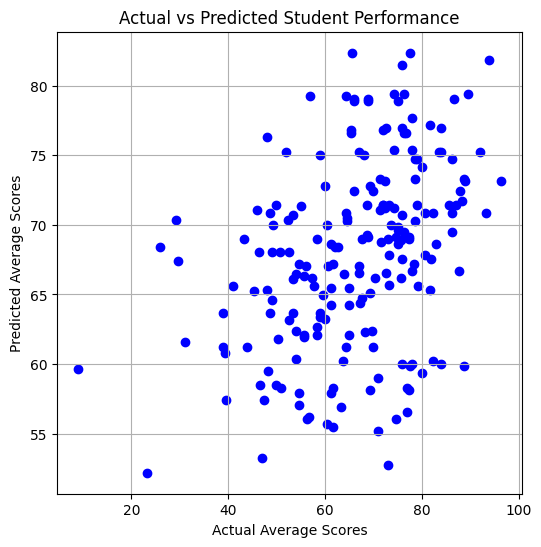

In [49]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Average Scores")
plt.ylabel("Predicted Average Scores")
plt.title("Actual vs Predicted Student Performance")
plt.grid(True)
plt.show()


In [50]:
import joblib
joblib.dump(model, "student_performance_model.pkl")
print("\n💾 Model saved as 'student_performance_model.pkl'")



💾 Model saved as 'student_performance_model.pkl'
